#Estudo do Risco Relativo no Banco Super Caja

**Título do projeto:** Automação da Análise de Crédito: Melhorando a Eficiência e Reduzindo o Risco de Inadimplência no Banco Super Caja

**Problema de Négocio:**O objetivo do projeto é automatizar o processo de análise de crédito no banco Super Caja, utilizando técnicas  de análise de dados para melhorar a eficiência, precisão e rapidez na avaliação de pedidos de crédito

#Instalando bibliotecas e interface com o bigquery

In [ ]:
!pip install google-cloud-bigquery
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy


#Conectar BigQuery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import pandas as pd

# Configurar o cliente BigQuery
project_id = "super-caja-risco-relativo"
client = bigquery.Client(project=project_id)

In [ ]:
# Query para pegar os dados do BigQuery
# Consulta SQL para selecionar as variáveis necessárias
query = """
SELECT
default_flag
,age
,last_month_salary
,number_dependents
,dependentes_dummy
,using_lines_not_secured_personal_assets
,number_times_delayed_payment_loan_30_59_days
,number_times_delayed_payment_loan_60_89_days
,more_90_days_overdue
,debt_ratio
--,qtd_real_estate
--,qtd_other
,qtd_real_estate + qtd_other as qtd_emprestimo_total

FROM
  `super-caja-risco-relativo.risco_credito.tb_score_credito_new`
"""

In [ ]:
# Executar a query
query_job = client.query(query)
results = query_job.result()

In [ ]:
# Criando um DataFrame
df = pd.DataFrame([dict(row) for row in results])

In [ ]:
df.describe()

,default_flag,age,sex_dummy,last_month_salary,number_dependents,dependentes_dummy,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,more_90_days_overdue,debt_ratio,qtd_emprestimo_total
count,35575.000000,35575.000000,35575.000000,3.557500e+04,35575.000000,35575.000000,35575.000000,35575.000000,35575.000000,35575.000000,35575.000000,35575.000000
mean,0.017484,52.534223,0.599944,6.447037e+03,0.741391,0.394491,5.864411,0.252481,0.069178,0.088545,355.537757,8.582853
std,0.131069,14.738055,0.489916,1.166701e+04,1.112101,0.488748,224.737077,0.873712,0.617048,0.715408,2023.263279,5.127896
min,0.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,42.000000,0.000000,3.945500e+03,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.200000,5.000000
50%,0.000000,52.000000,1.000000,5.400000e+03,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.400000,8.000000
75%,0.000000,63.000000,1.000000,7.494500e+03,1.000000,1.000000,0.530000,0.000000,0.000000,0.000000,0.900000,11.000000
max,1.000000,109.000000,1.000000,1.560100e+06,13.000000,1.000000,22000.000000,98.000000,98.000000,98.000000,307001.000000,57.000000


In [ ]:
import numpy as np
import pandas as pd

# Definindo o número de registros
num_records = 10000

# Gerando os dados aleatórios
np.random.seed(42)  # Para reprodutibilidade

default_flag = np.random.binomial(1, 0.3, num_records)  # Aproximadamente 30% de inadimplência
age = np.random.normal(50, 14, num_records).astype(int)  # Média de 40 anos, desvio padrão de 10
age = np.clip(age, 18, 100)  # Limitando a faixa etária entre 18 e 70 anos
last_month_salary = np.random.uniform(1000, 1000000, num_records)
number_dependents = np.random.randint(0, 9, num_records)
dependentes_dummy = (number_dependents > 0).astype(int)  # 0 para sem dependentes, 1 para com dependentes
using_lines_not_secured_personal_assets = np.random.randint(0, 30000, num_records)
number_times_delayed_payment_loan_30_59_days = np.random.randint(0, 85, num_records)
number_times_delayed_payment_loan_60_89_days = np.random.randint(0, 90, num_records)
more_90_days_overdue = np.random.randint(0, 95, num_records)
debt_ratio = np.random.uniform(0.1, 350000.0, num_records)
qtd_real_estate = np.random.randint(0, 30, num_records)
qtd_other = np.random.randint(0, 60, num_records)
qtd_emprestimo_total = qtd_real_estate + qtd_other


In [ ]:
# Criando o DataFrame
df2 = pd.DataFrame({
    'default_flag': default_flag,
    'age': age,
    'last_month_salary': last_month_salary,
    'number_dependents': number_dependents,
    'dependentes_dummy': dependentes_dummy,
})

# Exibindo as primeiras linhas do DataFrame
print(df2.head())

   default_flag  age  last_month_salary  number_dependents  dependentes_dummy
0             0   29      265587.547782                  7                  1
1             1   34      131897.477306                  6                  1
2             1   55      295437.543501                  4                  1
3             0   33      262559.744015                  1                  1
4             0   65      638073.712463                  5                  1


In [ ]:
import numpy as np
import pandas as pd

# Definindo o número de registros
num_records = 5000

# Definindo a semente para reprodutibilidade
np.random.seed(42)

# Gerando os dados aleatórios com distribuições apropriadas
default_flag = np.random.binomial(1, 0.3, num_records)  # Aproximadamente 30% de inadimplência
age = np.random.normal(50, 14, num_records).astype(int)  # Média de 40 anos, desvio padrão de 10
age = np.clip(age, 18, 100)  # Limitando a faixa etária entre 18 e 70 anos

sex_dummy = np.random.binomial(1, 0.4, num_records)  # Aproximadamente 50% para cada sexo

last_month_salary = np.random.normal(5000, 12000, num_records)  # Média de 5000, desvio padrão de 2000
last_month_salary = np.clip(last_month_salary, 0, 1500000)  # Limitando entre 1000 e 10000

number_dependents = np.random.poisson(1, num_records)  # Usando Poisson para número de dependentes
number_dependents = np.clip(number_dependents, 0, 13)  # Limitando entre 0 e 5 dependentes

dependentes_dummy = (number_dependents > 0).astype(int)  # 0 para sem dependentes, 1 para com dependentes

using_lines_not_secured_personal_assets = np.random.binomial(1, 0.3, num_records)  # Aproximadamente 40%

number_times_delayed_payment_loan_30_59_days = np.random.normal(0.3, 0.9, num_records)  # Usando Poisson para atrasos
number_times_delayed_payment_loan_30_59_days = np.clip(number_times_delayed_payment_loan_30_59_days, 0, 100)

number_times_delayed_payment_loan_60_89_days = np.random.normal(0.07, 0.7, num_records)
number_times_delayed_payment_loan_60_89_days = np.clip(number_times_delayed_payment_loan_60_89_days, 0, 100)

more_90_days_overdue = np.random.normal(0.08, 0.8, num_records)
more_90_days_overdue = np.clip(more_90_days_overdue, 0, 105)

debt_ratio = np.random.normal(0.5, 0.3, num_records)  # Média de 0.5, desvio padrão de 0.3
debt_ratio = np.clip(debt_ratio, 0.1, 2.0)  # Limitando entre 0.1 e 2.0

qtd_real_estate = np.random.poisson(1.5, num_records)  # Usando Poisson para quantidade de imóveis
qtd_real_estate = np.clip(qtd_real_estate, 0, 25)

qtd_other = np.random.poisson(8.5, num_records)  # Usando Poisson para quantidade de outros empréstimos
qtd_other = np.clip(qtd_other, 0, 100)

qtd_emprestimo_total = qtd_real_estate + qtd_other

# Criando o DataFrame
df2 = pd.DataFrame({
    'default_flag': default_flag,
    'age': age,
    'sex_dummy': sex_dummy,
    'last_month_salary': last_month_salary,
    'number_dependents': number_dependents,
    'dependentes_dummy': dependentes_dummy,
    'using_lines_not_secured_personal_assets': using_lines_not_secured_personal_assets,
    'number_times_delayed_payment_loan_30_59_days': number_times_delayed_payment_loan_30_59_days,
    'number_times_delayed_payment_loan_60_89_days': number_times_delayed_payment_loan_60_89_days,
    'more_90_days_overdue': more_90_days_overdue,
    'debt_ratio': debt_ratio,
    'qtd_real_estate': qtd_real_estate,
    'qtd_other': qtd_other,
    'qtd_emprestimo_total': qtd_emprestimo_total
})


In [ ]:
df2.describe()

,default_flag,age,sex_dummy,last_month_salary,number_dependents,dependentes_dummy,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,number_times_delayed_payment_loan_60_89_days,more_90_days_overdue,debt_ratio,qtd_real_estate,qtd_other,qtd_emprestimo_total
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.294000,49.324800,0.395200,7967.859906,0.980800,0.627600,0.292600,0.531220,0.306988,0.372723,0.510687,1.48400,8.448000,9.932000
std,0.455637,14.084835,0.488943,8809.058344,0.984797,0.483492,0.455002,0.638048,0.420459,0.495539,0.276697,1.21624,2.904649,3.157558
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00000,0.000000,0.000000
25%,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.295339,1.00000,6.000000,8.000000
50%,0.000000,49.000000,0.000000,5404.629185,1.000000,1.000000,0.000000,0.277413,0.065068,0.112403,0.494772,1.00000,8.000000,10.000000
75%,1.000000,59.000000,1.000000,13592.041754,2.000000,1.000000,1.000000,0.920820,0.531742,0.646078,0.700082,2.00000,10.000000,12.000000
max,1.000000,99.000000,1.000000,58749.011012,7.000000,1.000000,1.000000,3.655050,2.366210,2.909225,1.455030,8.00000,20.000000,22.000000


#Análise exploratória

Text(0.5, 0, 'Idade')

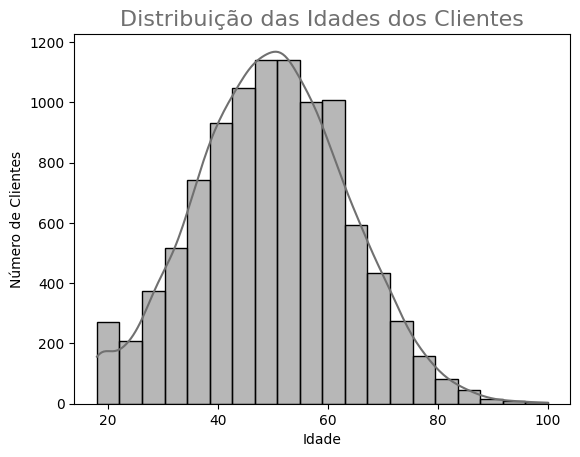

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando a cor
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = sns.color_palette(colors)

# Criando o gráfico com cores cinzas
sns.histplot(df2['age'], bins=20, kde=True, color=cmap[3])
plt.title('Distribuição das Idades dos Clientes', fontsize=16, color=cmap[3])
plt.ylabel('Número de Clientes')
plt.xlabel('Idade')


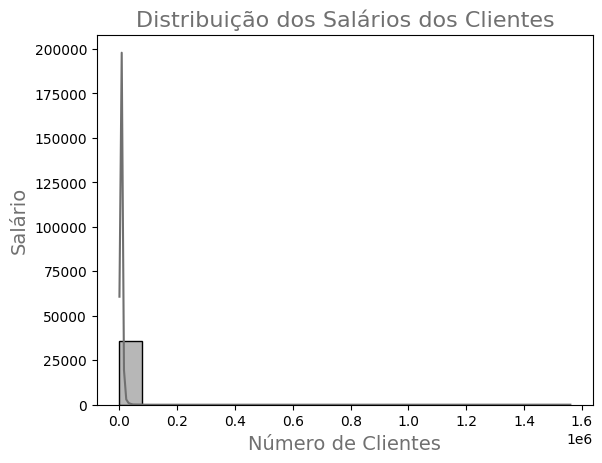

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando a cor
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = sns.color_palette(colors)

# Criando o gráfico com cores cinzas
sns.histplot(df['last_month_salary'], bins=20, kde=True, color=cmap[3])
plt.title('Distribuição dos Salários dos Clientes', fontsize=16, color=cmap[3])
plt.ylabel('Salário', fontsize=14, color=cmap[3])
plt.xlabel('Número de Clientes', fontsize=14, color=cmap[3])
plt.show()


Interptetação do gráfico: O gráfico mostra que a maioria dos clientes tem um salário entre 0 e 200.000 mil e um número pequeno de pessoas com sárário superior a 200.000

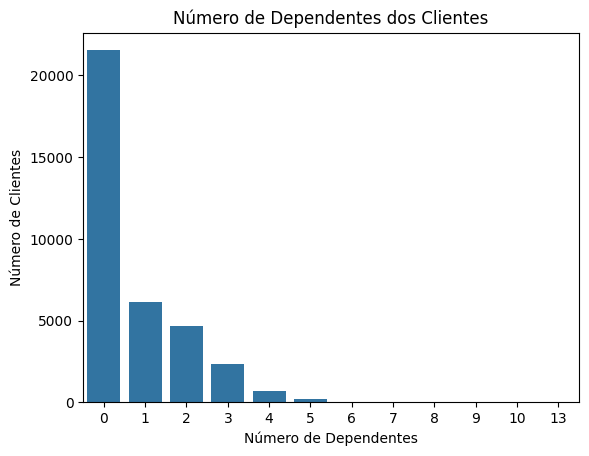

In [ ]:
#criando o gráfico
sns.countplot(x='number_dependents', data=df)
plt.title('Número de Dependentes dos Clientes')
plt.xlabel('Número de Dependentes')
plt.ylabel('Número de Clientes')
plt.show()


#Matriz de Confusão

## Matriz de Confusão com algumas variáveis

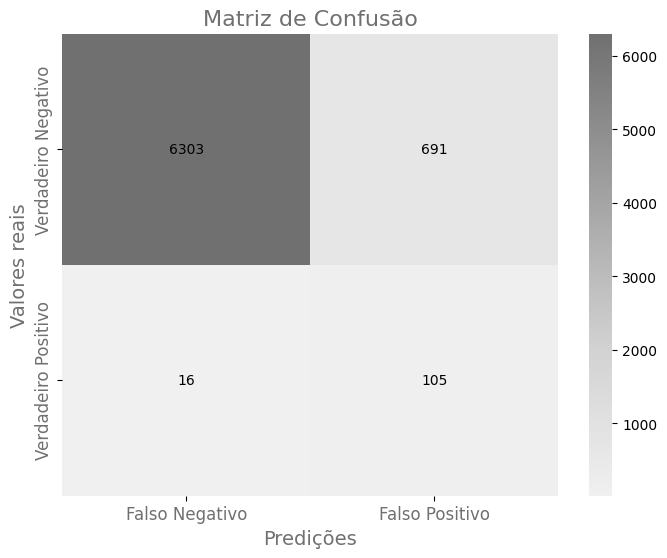

Matriz de Confusão:
[[6303  691]
 [  16  105]]
True Positive: 105
False Positive: 691
False Negative: 16
True Negative: 6303

Métricas de Avaliação:
Accuracy: 0.9006324666198173
Precision: 0.13190954773869346
Recall: 0.8677685950413223
F1 Score: 0.22900763358778625


In [ ]:
#importando bibliotecas

#manipulação dos dados
import pandas as pd
import numpy as np

#Estatística
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Carregar os dados
df = pd.read_csv('/content/tb_dummy.csv')

# Separar as características de entrada (X) e saída variável dependente (y)
X = df[['age_dummy', 'dependent_dummy', 'salary_dummy', 'qtd_emprestimos_total_dummy', 'more_90_days_dummy', 'using_lines_dummy', 'debt_ratio_dummy']]
y = df['default_flag']

# Dividir os dados em conjunto de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação  do SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinamento do modelo RandomForestClassifier
# Cria e treinar o modelo de RandomForest usando os dados de treino balanceados
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Realizar predições no conjunto de teste
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# configurar a cor
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = LinearSegmentedColormap.from_list("custom_gray", colors)

# ajustando a cor e legenda
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "black"})  # Cor das anotações alterada para preto
plt.xlabel('Predições', fontsize=14, color="#707070")
plt.ylabel('Valores reais', fontsize=14, color="#707070")
plt.title('Matriz de Confusão', fontsize=16, color="#707070")
plt.xticks(ticks=[0.5, 1.5], labels=['Falso Negativo', 'Falso Positivo'], fontsize=12, color="#707070")
plt.yticks(ticks=[0.5, 1.5], labels=['Verdadeiro Negativo', 'Verdadeiro Positivo'], fontsize=12, color="#707070")
plt.show()

#exibindo os resultados
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)
print(f'True Positive: {tp}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Negative: {tn}')

print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


**Interpretação dos resultados:**

 Verdadeiro Negativo (TN): 6303 (não inadimplentes corretamente classificados como não inadimplentes)

Falso Positivo (FP): 691 (não inadimplentes incorretamente classificados como inadimplentes)

Falso Negativo (FN): 16 (inadimplentes incorretamente classificados como não inadimplentes)

Verdadeiro Positivo (TP): 105 (inadimplentes corretamente classificados como inadimplentes)

Métricas de Avaliação:

Accuracy (Acurácia): aproximadamente 90% das previsões estão corretas.

Precision (Precisão): Indica que, dos casos previstos como inadimplentes, apenas 13.19% eram realmente inadimplentes

Recall (Sensibilidade): Com um recall de 86.78%, isso significa que o modelo é capaz de identificar 86.78% dos inadimplentes reais.

F1 Score: Com um F1 Score de 22.90%, o modelo está balanceando relativamente bem a precisão e o recall

Os resultados mostram que o modelo, com o balanceamento com SMOTE, consegue identificar inadimplentes melhor (alto recall), mas faz muitas predições erradas de inadimplência. Isso indica que o modelo é bom em detectar a maioria dos inadimplentes, mas também classifica muitos não inadimplentes como inadimplentes, precisa ser melhorado em termos de precisão para reduzir o número de falsos positivos

#Matriz de Confusão: Avaliando duas variáveis default_flag e score, buscando entender e melhorar as métricas

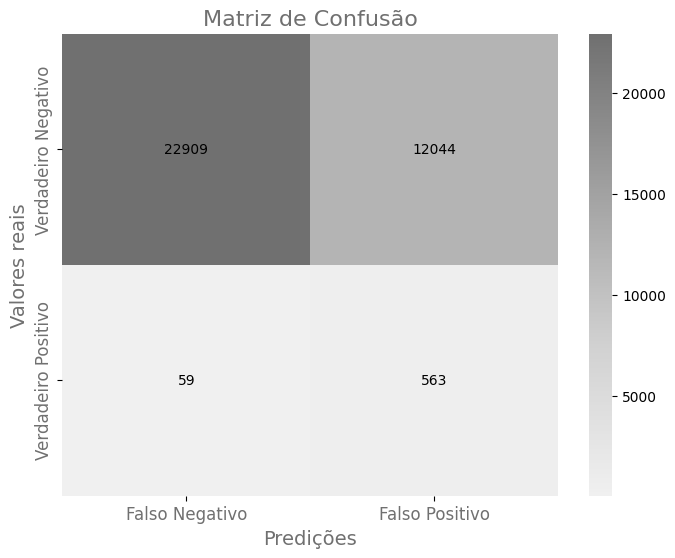

Matriz de Confusão:
[[22909 12044]
 [   59   563]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.660
Precisão:  0.045
Sensibilidade (Recall):  0.905
F1-score:  0.085


In [ ]:
#Importando as bibliotecas e tabela

#Gráficos para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#Manipulação dos dados
import pandas as pd
import numpy as np

#Estatística
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/tb_dummy.csv')

# Variáveis
y_true = df['default_flag']
y_pred = df['score_0_1']

# Métricas de avaliação
cm = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Alterando a cor padrão do gráfico
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = LinearSegmentedColormap.from_list("custom_gray", colors)

# Ajustando cores e legenda
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "black"})  # Cor das anotações alterada para preto
plt.xlabel('Predições', fontsize=14, color="#707070")
plt.ylabel('Valores reais', fontsize=14, color="#707070")
plt.title('Matriz de Confusão', fontsize=16, color="#707070")
plt.xticks(ticks=[0.5, 1.5], labels=['Falso Negativo', 'Falso Positivo'], fontsize=12, color="#707070")
plt.yticks(ticks=[0.5, 1.5], labels=['Verdadeiro Negativo', 'Verdadeiro Positivo'], fontsize=12, color="#707070")
plt.show()


#Métricas de avaliação do modelo
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {recall: .3f}")
print(f"F1-score: {f1: .3f}")

**Interpretação dos resultados:**

Verdadeiro Positivo (TP): 563 - Número de inadimplentes corretamente classificados como inadimplentes.

Falso Positivo (FP): 12044 - Número de não inadimplentes incorretamente classificados como inadimplentes.

Falso Negativo (FN): 59 - Número de inadimplentes incorretamente classificados como não inadimplentes.

Verdadeiro Negativo (TN): 22909 - Número de não inadimplentes corretamente classificados como não inadimplentes.



Métricas de Avaliação:


Accuracy (Acurácia): aproximadamente 66% das previsões estão corretas.

Precision (Precisão): Indica que, dos casos previstos como inadimplentes, apenas 4,5% eram realmente inadimplentes

Recall (Sensibilidade): Com um recall de 90,5%, isso significa que o modelo é capaz de identificar 90,5% dos inadimplentes reais.

F1 Score: Com um F1 Score de 8,5%, o modelo está balanceando relativamente bem a precisão e o recall

Os resultados mostram que o modelo, é eficaz em identificar inadimplentes (alto recall), mas precisa ser melhorado em termos de precisão para reduzir o número de falsos positivos

#Matriz de Confusão: Ajustes para melhorar a precisão com balanceamento das classes com SMOTE, normalização das variáveis, e uso de um RandomForestClassifier

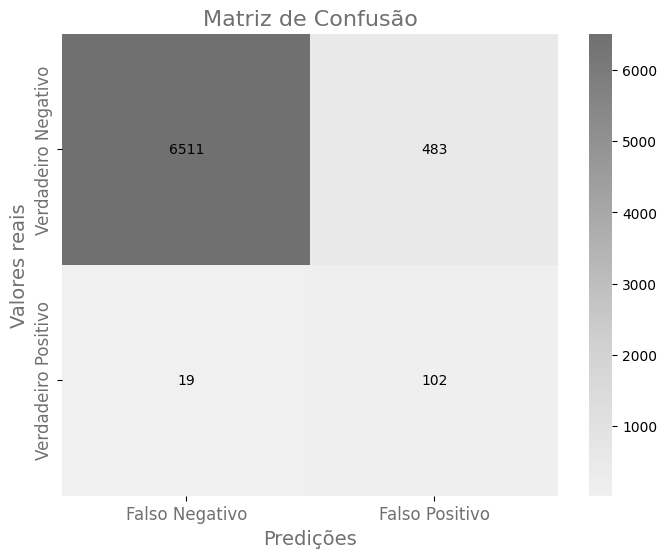

Matriz de Confusão:
[[6511  483]
 [  19  102]]
True Positive: 102
False Positive: 483
False Negative: 19
True Negative: 6511

Métricas de Avaliação:
Exatidão (Accuracy): 0.929
Precisão (Precision): 0.174
Sensibilidade (Recall): 0.843
F1 Score: 0.289

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6994
           1       0.17      0.84      0.29       121

    accuracy                           0.93      7115
   macro avg       0.59      0.89      0.63      7115
weighted avg       0.98      0.93      0.95      7115



In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Carregar os dados
df = pd.read_csv('/content/tb_dummy.csv')

# Divisão em variáveis de entrada (X) e saída (y)
X = df.drop(columns=['user_id', 'default_flag', 'score_0_1'])
y = df['default_flag']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das variáveis de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicação da técnica de sobreamostragem SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinamento do modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Previsões
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Definindo a cor personalizada de cinza do claro para o mais escuro
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = LinearSegmentedColormap.from_list("custom_gray", colors)

# Ajustando a cor e legenda
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "black"})  # Cor das anotações alterada para preto
plt.xlabel('Predições', fontsize=14, color="#707070")
plt.ylabel('Valores reais', fontsize=14, color="#707070")
plt.title('Matriz de Confusão', fontsize=16, color="#707070")
plt.xticks(ticks=[0.5, 1.5], labels=['Falso Negativo', 'Falso Positivo'], fontsize=12, color="#707070")
plt.yticks(ticks=[0.5, 1.5], labels=['Verdadeiro Negativo', 'Verdadeiro Positivo'], fontsize=12, color="#707070")
plt.show()

# Exibindo a matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Calculando e exibindo os valores TP, FP, FN, TN
tn, fp, fn, tp = cm.ravel()
print(f'True Positive: {tp}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Negative: {tn}')

# Exibindo as métricas de avaliação do modelo
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f'Exatidão (Accuracy): {accuracy:.3f}')
print(f'Precisão (Precision): {precision:.3f}')
print(f'Sensibilidade (Recall): {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

# Exibir relatório de classificação completo
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred))


**Interpretação dos resultados:**

Verdadeiros Positivos (TP): 102 (número de casos positivos corretamente identificados) inadimplentes corretamente classificados como inadimplentes

Falsos Positivos (FP): 483 (número de casos negativos incorretamente identificados como positivos)

Verdadeiros Negativos (TN): 6511 (número de casos negativos corretamente identificados)

Falsos Negativos (FN): 19 (número de casos positivos incorretamente identificados como negativos)




Métricas de Avaliação:

Accuracy (Acurácia): aproximadamente 92.9% das previsões estão corretas.


Precision (Precisão): Uma precisão de 17.4% indica que, dos casos previstos como inadimplentes, apenas 17.4% eram realmente inadimplentes.


Recall (Sensibilidade): Com um recall de 84.3%, isso significa que o modelo é capaz de identificar 84.3% dos inadimplentes reais


F1 Score: Com um F1 Score de 28.9%, o modelo está balanceando a precisão e o recall, mas a baixa precisão impacta negativamente o F1 Score.



O modelo apresenta uma boa exatidão geral, indicando que é eficaz na classificação de casos negativos, identifica inadimplentes (alto recall) e tem uma boa acurácia geral. No entanto, sua precisão é baixa, sugerindo que muitas das previsões positivas são incorretas.



#Matriz de Confusão:  Melhorando a precisão do modelo

   user_id  age  last_month_salary   debt_ratio  \
0    34981   48               9000     0.087657   
1    28926   48              12191     0.333087   
2    25731   49              11361     0.368861   
3     9434   51               5400  4797.000000   
4    15412   51               5720     0.003671   

   using_lines_not_secured_personal_assets  total_emprestimos  \
0                                 0.459379                  7   
1                                 0.021699                  7   
2                                 0.031675                  7   
3                                 0.143895                  7   
4                                 0.030176                  7   

   more_90_days_overdue  default_flag  age_dummy  salary_dummy  \
0                     0             0          0             0   
1                     0             0          0             0   
2                     0             0          0             0   
3                     0             0 

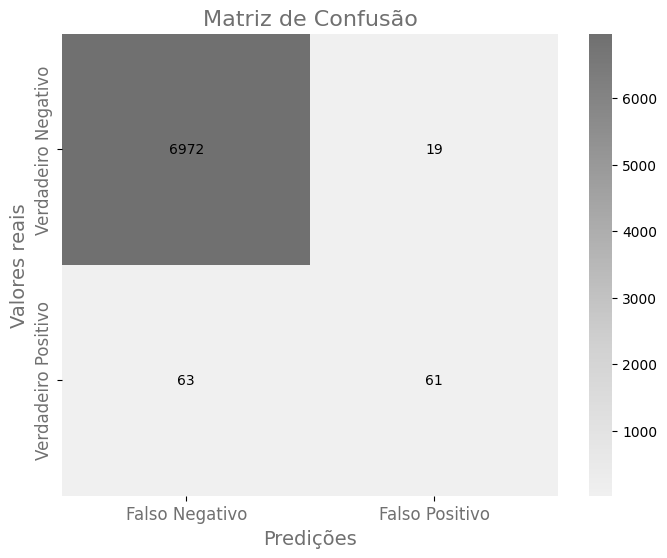

Matriz de Confusão:
[[6972   19]
 [  63   61]]

Métricas de Avaliação:
Exatidão (Accuracy): 0.988
Precisão: 0.762
Sensibilidade (Recall): 0.492
F1-score: 0.598


In [ ]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import LinearSegmentedColormap

# Configurar o cliente BigQuery
project_id = "super-caja-risco-relativo"
client = bigquery.Client(project=project_id)

# Query para pegar os dados do BigQuery
query = """
SELECT
  user_id,
  age,
  last_month_salary,
  debt_ratio,
  using_lines_not_secured_personal_assets,
  total_emprestimos,
  more_90_days_overdue,
  default_flag,
  age_dummy,
  salary_dummy,
  more_90_days_dummy,
  using_lines_dummy,
  total_emprestimos_dummy,
  debt_ratio_dummy,
  score_dummy
FROM
  `super-caja-risco-relativo.risco_credito.tb_dummy_score`
"""

# Executar a query
query_job = client.query(query)
results = query_job.result()

# Criando um DataFrame
df = pd.DataFrame([dict(row) for row in results])

# Criação de uma nova variável
df['risk_score_binary'] = np.where(df['score_dummy'] <= 3, 0, 1)

# Divisão em variáveis de entrada (X) e saída (y)
X = df.drop(columns=['user_id', 'default_flag', 'score_dummy', 'risk_score_binary'])
y = df['default_flag']

# Divisão dos dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das variáveis de entrada para padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo RandomForestClassifier usando os dados de treino
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# usando o modelo treinado para fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão para avaliar o modelo de classificação
cm = confusion_matrix(y_test, y_pred)

# Métricas de avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Ajustando a cor
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = LinearSegmentedColormap.from_list("custom_gray", colors)

# Personalizando o gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "black"})  # Cor das anotações alterada para preto
plt.xlabel('Predições', fontsize=14, color="#707070")
plt.ylabel('Valores reais', fontsize=14, color="#707070")
plt.title('Matriz de Confusão', fontsize=16, color="#707070")
plt.xticks(ticks=[0.5, 1.5], labels=['Falso Negativo', 'Falso Positivo'], fontsize=12, color="#707070")
plt.yticks(ticks=[0.5, 1.5], labels=['Verdadeiro Negativo', 'Verdadeiro Positivo'], fontsize=12, color="#707070")
plt.show()

# Exibir matriz de confusão
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Exibir as métricas de avaliação do modelo
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy:.3f}")
print(f"Precisão: {precision:.3f}")
print(f"Sensibilidade (Recall): {recall:.3f}")
print(f"F1-score: {f1:.3f}")


**Interpretação dos resultados:**

Verdadeiro  Negativo (TN): 6972

Falso Positivo (FP): 19

Falso Negativo (FN): 63

Verdadeiro Positivo (TP): 61


Exatidão (Accuracy): A exatidão é de 98.8%, indicando que o modelo está correto na maioria das previsões.

Precisão (Precision): A precisão é de 76.2%, o que significa que, das previsões que o modelo fez como inadimplência, 76.2% estavam corretas, ou seja, o modelo está cometendo poucos falsos positivos (classificando incorretamente clientes como inadimplentes).

Sensibilidade (Recall): A sensibilidade é de 49.2%, indicando que o modelo está identificando corretamente 49.2% dos casos de inadimplência.

F1-score:  O F1-score é de 59.8%, visão equilibrada do desempenho do modelo moderado.

#Matriz de Confusão: Ajustes para  melhorar o recall

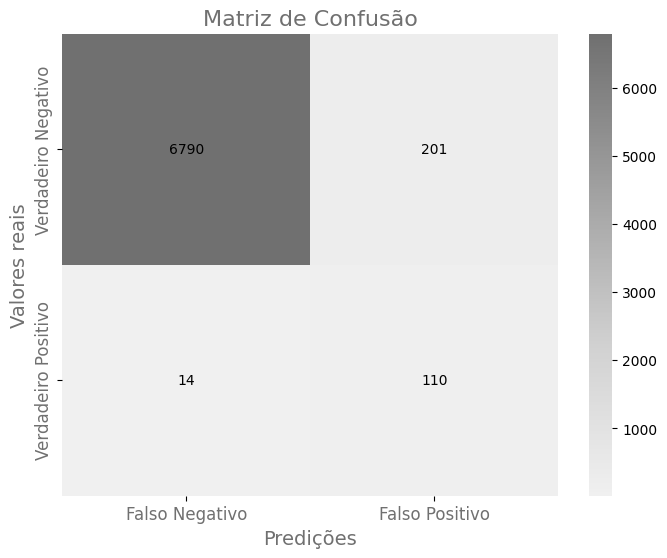

Matriz de Confusão:
[[6790  201]
 [  14  110]]

Métricas de Avaliação:
Exatidão (Accuracy): 0.970
Precisão (Precision): 0.354
Sensibilidade (Recall): 0.887
F1-score: 0.506

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      6991
           1       0.35      0.89      0.51       124

    accuracy                           0.97      7115
   macro avg       0.68      0.93      0.75      7115
weighted avg       0.99      0.97      0.98      7115



In [ ]:
# Importação das bibliotecas necessárias
from google.cloud import bigquery
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Configurar o cliente BigQuery
project_id = "super-caja-risco-relativo"
client = bigquery.Client(project=project_id)

# Query para pegar os dados do BigQuery
query = """
SELECT
  user_id,
  age,
  last_month_salary,
  debt_ratio,
  using_lines_not_secured_personal_assets,
  total_emprestimos,
  more_90_days_overdue,
  default_flag,
  age_dummy,
  salary_dummy,
  more_90_days_dummy,
  using_lines_dummy,
  total_emprestimos_dummy,
  debt_ratio_dummy,
  score_dummy
FROM
  `super-caja-risco-relativo.risco_credito.tb_dummy_score`
"""

# Executar a query
query_job = client.query(query)
results = query_job.result()

# Criando um DataFrame
df = pd.DataFrame([dict(row) for row in results])



# Criação de uma nova variável
df['score_dummy_binary'] = np.where(df['score_dummy'] <= 3, 0, 1)

# Divisão em variáveis de entrada (X) e saída (y)
X = df.drop(columns=['user_id', 'default_flag', 'score_dummy', 'score_dummy_binary'])
y = df['default_flag']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das variáveis de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicação da técnica de sobreamostragem SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinamento do modelo RandomForestClassifier com ajuste de hiperparâmetros
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Previsões
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibir matriz de confusão com cores ajustadas
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = LinearSegmentedColormap.from_list("custom_gray", colors)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "black"})
plt.xlabel('Predições', fontsize=14, color="#707070")
plt.ylabel('Valores reais', fontsize=14, color="#707070")
plt.title('Matriz de Confusão', fontsize=16, color="#707070")
plt.xticks(ticks=[0.5, 1.5], labels=['Falso Negativo', 'Falso Positivo'], fontsize=12, color="#707070")
plt.yticks(ticks=[0.5, 1.5], labels=['Verdadeiro Negativo', 'Verdadeiro Positivo'], fontsize=12, color="#707070")
plt.show()

# Exibir resultados
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)

# Exibir métricas de avaliação
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy:.3f}")
print(f"Precisão (Precision): {precision:.3f}")
print(f"Sensibilidade (Recall): {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# Exibir relatório de classificação completo
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred))


**Interpretação dos resultados:**

Verdadeiros Negativos (VN): 6790

Falsos Positivos (FP): 201

Falsos Negativos (FN): 14

Verdadeiros Positivos (VP): 110

Métricas de Avaliação:

Exatidão (Accuracy): A exatidão de 97.0% indica que o modelo está correto na maioria das previsões.

Precisão (Precision): A precisão de 35.4% significa que, das previsões que o modelo fez como inadimplência, apenas 35.4% estavam corretas.

Sensibilidade (Recall): A sensibilidade de 88.7% significa que o modelo está identificando corretamente 88.7% dos casos de inadimplência.

F1-score: O F1-score de 50.6% moderado



# Avaliando as variáveis e buscando melhorar em todos os aspectos

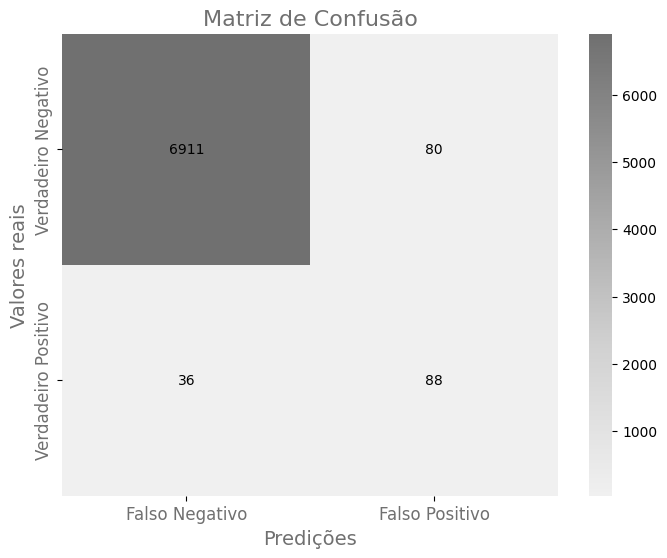

Matriz de Confusão:
[[6911   80]
 [  36   88]]
True Positive: 88
False Positive: 80
False Negative: 36
True Negative: 6911

Métricas de Avaliação:
Accuracy: 0.984
Precision: 0.524
Recall: 0.710
F1 Score: 0.603


In [ ]:
# Importação das bibliotecas necessárias

#conectando com o bigquery
from google.cloud import bigquery

#manipulação dos dados
import pandas as pd
import numpy as np

#Estatísticas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns

#visualização
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Configurar o cliente BigQuery
project_id = "super-caja-risco-relativo"
client = bigquery.Client(project=project_id)

# Query para pegar os dados do BigQuery
query = """
SELECT
  user_id,
  age,
  last_month_salary,
  debt_ratio,
  using_lines_not_secured_personal_assets,
  total_emprestimos,
  more_90_days_overdue,
  default_flag,
  age_dummy,
  salary_dummy,
  more_90_days_dummy,
  using_lines_dummy,
  total_emprestimos_dummy,
  debt_ratio_dummy,
  score_dummy
FROM
  `super-caja-risco-relativo.risco_credito.tb_dummy_score`
"""

# Executar a query
query_job = client.query(query)
results = query_job.result()

# Criando um DataFrame
df = pd.DataFrame([dict(row) for row in results])

# Criação da variável risk_score_binary
df['score_dummy_binary'] = np.where(df['score_dummy'] <= 2, 0, 1)

# Divisão em variáveis de entrada (X) e saída (y)
X = df.drop(columns=['user_id', 'default_flag', 'score_dummy', 'score_dummy_binary'])
y = df['default_flag']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização das variáveis de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Aplicação da técnica de sobreamostragem SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Treinamento do modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Previsões
y_pred = model.predict(X_test)

# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Ajustando a cor
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = LinearSegmentedColormap.from_list("custom_gray", colors)

# Ajustando a cor e legenda
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "black"})  # Cor das anotações alterada para preto
plt.xlabel('Predições', fontsize=14, color="#707070")
plt.ylabel('Valores reais', fontsize=14, color="#707070")
plt.title('Matriz de Confusão', fontsize=16, color="#707070")
plt.xticks(ticks=[0.5, 1.5], labels=['Falso Negativo', 'Falso Positivo'], fontsize=12, color="#707070")
plt.yticks(ticks=[0.5, 1.5], labels=['Verdadeiro Negativo', 'Verdadeiro Positivo'], fontsize=12, color="#707070")
plt.show()

# Exibindo os resultados
print("\033[1mMatriz de Confusão:\033[0m")
print(cm)
print(f'True Positive: {cm[1, 1]}')
print(f'False Positive: {cm[0, 1]}')
print(f'False Negative: {cm[1, 0]}')
print(f'True Negative: {cm[0, 0]}')

print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')





**Interpretação dos resultados:**

Verdadeiro Negativo (TN): 6911
Falso Positivo (FP): 80
Falso Negativo (FN): 36
Verdadeiro Positivo (TP): 88


Métricas de Avaliação:

Exatidão (Accuracy): A exatidão de 98.4% indica que o modelo está correto na maioria das previsões

Precisão (Precision): A precisão de 52.4% significa que, das previsões que o modelo fez como inadimplência, 52.4% estavam corretas.

Sensibilidade (Recall): A sensibilidade de 71.0% significa que o modelo está identificando corretamente 71.0% dos casos de inadimplência.

F1 Score: O F1 Score de 60.3% indica que a precisão e a sensibilidade são equilibradas

O modelo  esenvolvido demonstrou ser eficaz na identificação de clientes com alto risco de inadimplência.

# Regressão Logística

# Mostrando a probabilidade de inadimplência

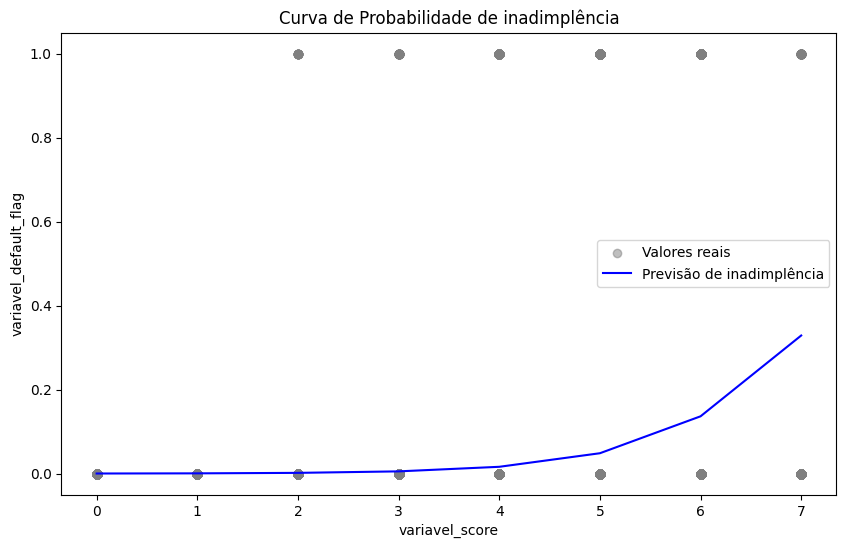

In [ ]:
#Importando as bibliotecas e tabela
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

df = pd.read_csv('/content/tb_dummy.csv')

# Modelo de regressão logística
logistic_model = LogisticRegression()
logistic_model.fit(df[['score']], df['default_flag'])

probabilities = logistic_model.predict_proba(df[['score']])[:, 1]

# Inserindo o gráfico de dispersão
plt.figure(figsize=(10, 6))

# dados sendo inseridos
plt.scatter(df['score'], df['default_flag'], alpha=0.5, color='gray', label='Valores reais')

# Adicionando a curva de probabilidade da regressão logística
sorted_indices = np.argsort(df['score'])
sorted_score_dummy = df['score'].iloc[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]
plt.plot(sorted_score_dummy, sorted_probabilities, color='blue', label='Previsão de inadimplência')

# Títulos e rótulos
plt.title('Curva de Probabilidade de inadimplência')
plt.xlabel('variavel_score')
plt.ylabel('variavel_default_flag')
plt.legend()

plt.show()


**Interpretação do gráfico**: O gráfico mostra a probabilidade de inadimplência em relação a uma pontuação de risco, o que significa que quanto maior a pontuação de risco, maior a probabilidade de inadimplência.

Este gráfico é útil para avaliar visualmente como as predições do modelo se comparam aos dados reais, ajudando a interpretar o desempenho da regressão logística na tarefa de previsão de inadimplência.

# Regressão Logística: Calculando a probabilidade de inadimplência

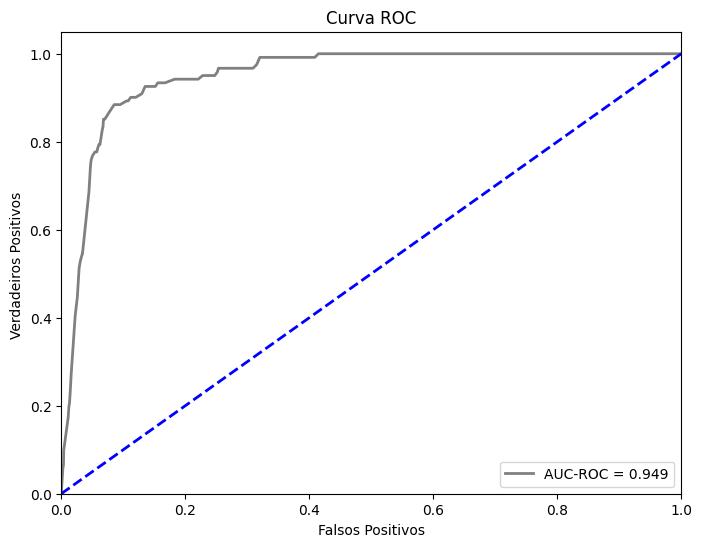

Regressão Logística:
[[6503  491]
 [  18  103]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.928
Precisão:  0.173
Sensibilidade (Recall):  0.851
F1-score:  0.288
AUC-ROC:  0.949
Log-Loss:  0.287
Acurácia no conjunto de treino: 0.931
Acurácia no conjunto de teste: 0.928


In [ ]:
#importando bibliotecas e tabelas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss, roc_curve
from sklearn.feature_selection import RFE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/tb_dummy.csv')

# Separar as características e a variável dependente
X = df[['age_dummy', 'dependent_dummy', 'salary_dummy', 'qtd_emprestimos_total_dummy', 'more_90_days_dummy', 'using_lines_dummy', 'debt_ratio_dummy']]
y = df['default_flag']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando  modelo de regressão logística
model = LogisticRegression(class_weight='balanced')

# Aplicar Recursive Feature Elimination (RFE)
selector = RFE(model, n_features_to_select=1)
selector = selector.fit(X_train, y_train)

# Treinando o modelo
model.fit(X_train, y_train)

# Realizar predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calcular métricas de avaliação
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculando AUC-ROC e Log-Loss
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
log_loss_value = log_loss(y_test, model.predict_proba(X_test))

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])


# Exibir curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='gray', lw=2, label=f'AUC-ROC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos ')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Exibir resultados
print("\033[1mRegressão Logística:\033[0m")
print(conf_matrix)

print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {sensitivity: .3f}")
print(f"F1-score: {f1_score: .3f}")
print(f"AUC-ROC: {roc_auc: .3f}")
print(f"Log-Loss: {log_loss_value: .3f}")

# Avaliar os modelos de teste e treino
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia no conjunto de treino: {train_accuracy:.3f}')
print(f'Acurácia no conjunto de teste: {test_accuracy:.3f}')


 **Interpretação do resultados:**

Verdadeiro Negativo (TN): 6503
Falso Positivo (FP): 491
Falso Negativo (FN): 18
Verdadeiro Positivo (TP): 103

 Exatidão (Accuracy): A exatidão indica que 92,8% das previsões do modelo estão corretas. Isso é um bom indicador geral do desempenho.

 Precisão (Precision): A precisão é a proporção de previsões positivas corretas entre todas as previsões positivas feitas pelo modelo com 17,3% previsões corretas.

 Sensibilidade (Recall): 85,1% dos casos reais de inadimplência foram corretamente identificados pelo modelo. Isso mostra que o modelo é bom em detectar casos de inadimplência (baixa taxa de falsos negativos).

 F1-Score:  O F1-score é a média harmônica entre precisão e recall. Com um valor de 0,288, o modelo indica um equilibrio baixo podendo ser melhorado

AUC-ROC: A Área Sob a Curva (AUC) da Característica Operacional do Receptor (ROC) mede a capacidade do modelo de distinguir entre as classes positivas e negativas. Um valor de 0,949 pode ser considerado um bom valor positivo , indicando que o modelo tem uma alta capacidade de discriminação.

Log-Loss:  O Log-Loss mede a penalidade por previsões incorretas e leva em consideração a confiança do modelo, Um valor de 0,287 indica que o modelo tem um desempenho relativamente bom em termos de probabilidade de previsão

O modelo possui uma alta acurácia e AUC-ROC tanto nos dados de treino quanto nos dados de teste, tem um bom desempenho o que é positivo. A precisão é um pouco baixa, indicando que o modelo pode estar classificando muitos casos de forma errada como inadimplentes. A sensibilidade é alta, o que significa que o modelo consegue identificar a maioria dos casos de inadimplência. O Log-Loss está em um nível razoável, e o modelo parece generalizar bem para novos dados

#Regressão logística com validação cruzada

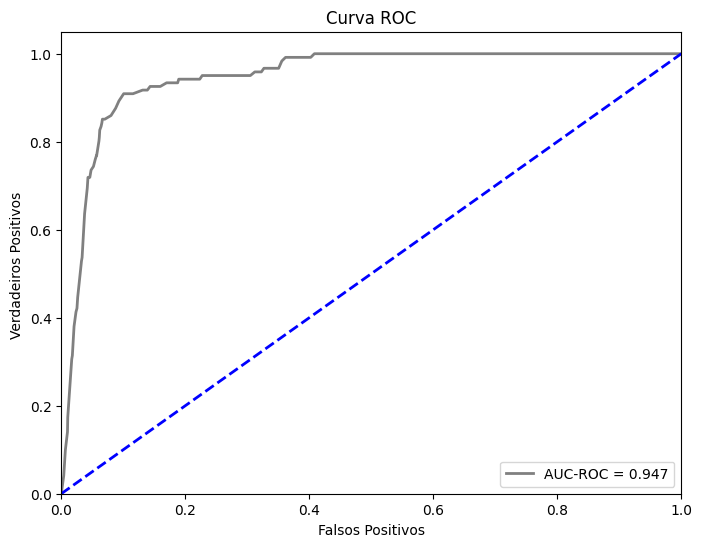

Regressão Logística com Validação Cruzada:
[[6503  491]
 [  18  103]]

Métricas de Avaliação:
Exatidão (Accuracy):  0.928
Precisão:  0.173
Sensibilidade (Recall):  0.851
F1-score:  0.288
AUC-ROC:  0.947
Log-Loss:  0.306
Acurácia no conjunto de treino: 0.931
Acurácia no conjunto de teste: 0.928
Acurácia média com validação cruzada (CV=5): 0.783


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss, roc_curve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('/content/tb_dummy.csv')

# Separar as características e a variável dependente
X = df[['age_dummy', 'dependent_dummy', 'salary_dummy', 'qtd_emprestimos_total_dummy', 'more_90_days_dummy', 'using_lines_dummy', 'debt_ratio_dummy']]
y = df['default_flag']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo de regressão logística com validação cruzada
model = LogisticRegressionCV(cv=5, class_weight='balanced', max_iter=1000, scoring='accuracy')

# Treinando o modelo
model.fit(X_train, y_train)

# Realizar predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calcular métricas de avaliação
tn, fp, fn, tp = conf_matrix.ravel()
precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculando AUC-ROC e Log-Loss
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
log_loss_value = log_loss(y_test, model.predict_proba(X_test))

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Exibir curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='gray', lw=2, label=f'AUC-ROC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos ')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Exibir resultados
print("\033[1mRegressão Logística com Validação Cruzada:\033[0m")
print(conf_matrix)

print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy: .3f}")
print(f"Precisão: {precision: .3f}")
print(f"Sensibilidade (Recall): {sensitivity: .3f}")
print(f"F1-score: {f1_score: .3f}")
print(f"AUC-ROC: {roc_auc: .3f}")
print(f"Log-Loss: {log_loss_value: .3f}")

# Avaliar os modelos de teste e treino
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Acurácia no conjunto de treino: {train_accuracy:.3f}')
print(f'Acurácia no conjunto de teste: {test_accuracy:.3f}')

# Validação cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Acurácia média com validação cruzada (CV=5): {cv_scores.mean():.3f}')


#Regressão Logística: Avaliando a probabilidade de inadimplência com alguns ajustes ao modelo

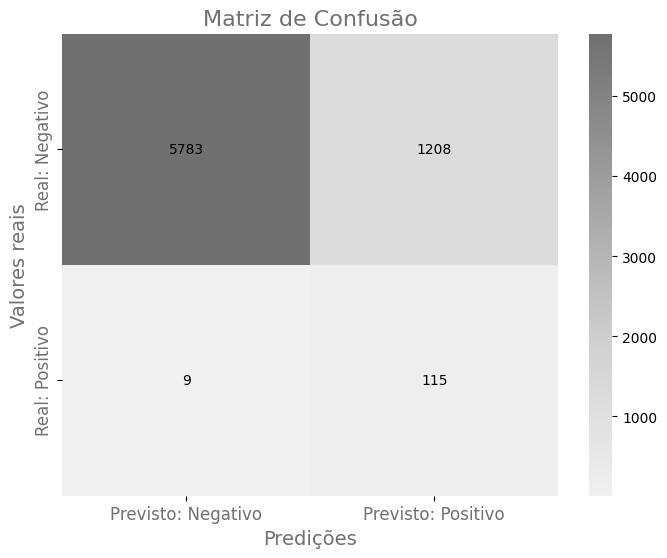

Matriz de Confusão:
[[5783 1208]
 [   9  115]]
True Positive: 115
False Positive: 1208
False Negative: 9
True Negative: 5783

Métricas de Avaliação:
Accuracy: 0.829
Precision: 0.087
Recall: 0.927
F1 Score: 0.159
AUC-ROC: 0.951
Log-Loss: 0.285

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90      6991
           1       0.09      0.93      0.16       124

    accuracy                           0.83      7115
   macro avg       0.54      0.88      0.53      7115
weighted avg       0.98      0.83      0.89      7115

Primeiras 10 probabilidades previstas:
[0.24299367 0.0093898  0.00630163 0.01175575 0.00907129 0.92887322
 0.35199691 0.35927568 0.00415837 0.00661603]


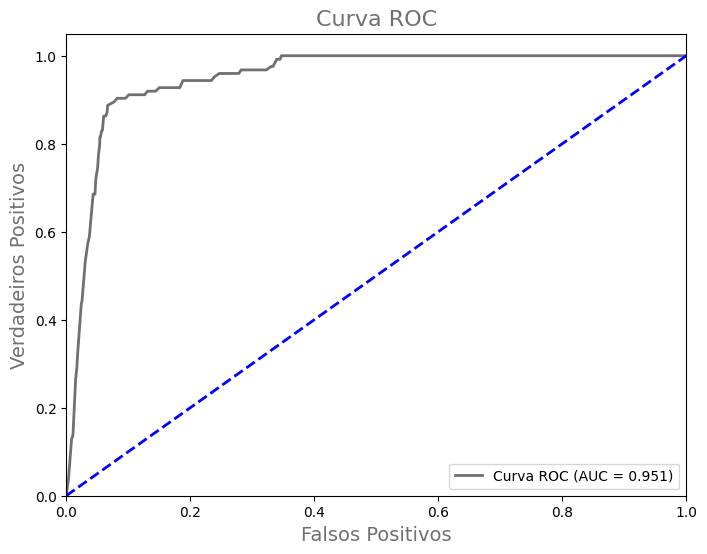

In [ ]:
#importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, log_loss, classification_report, confusion_matrix)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Normalização das variáveis de entrada
scaler = StandardScaler()
X_train_bal = scaler.fit_transform(X_train_bal)
X_test = scaler.transform(X_test)

# Treinamento do modelo de Regressão Logística
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_bal, y_train_bal)

# Previsão das probabilidades
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Ajuste do limiar de decisão
threshold = 0.3  # Ajustado
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Cálculo da matriz de confusão
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Métricas de avaliação com o novo limiar
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)
roc_auc_adjusted = auc(*roc_curve(y_test, y_pred_proba)[:2])
logloss_adjusted = log_loss(y_test, y_pred_proba)

# Ajustando a cor da Matriz de Confusão
colors = ["#f0f0f0", "#d0d0d0", "#a0a0a0", "#707070"]
cmap = LinearSegmentedColormap.from_list("custom_gray", colors)

# Exibir matriz de confusão
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap=cmap, cbar=True, annot_kws={"color": "black"})  # Cor das anotações alterada para preto
plt.xlabel('Predições', fontsize=14, color="#707070")
plt.ylabel('Valores reais', fontsize=14, color="#707070")
plt.title('Matriz de Confusão', fontsize=16, color="#707070")
plt.xticks(ticks=[0.5, 1.5], labels=['Previsto: Negativo', 'Previsto: Positivo'], fontsize=12, color="#707070")
plt.yticks(ticks=[0.5, 1.5], labels=['Real: Negativo', 'Real: Positivo'], fontsize=12, color="#707070")
plt.show()

# Exibindo os resultados
print("\033[1mMatriz de Confusão:\033[0m")
print(cm_adjusted)
print(f'True Positive: {cm_adjusted[1, 1]}')
print(f'False Positive: {cm_adjusted[0, 1]}')
print(f'False Negative: {cm_adjusted[1, 0]}')
print(f'True Negative: {cm_adjusted[0, 0]}')

print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f'Accuracy: {accuracy_adjusted:.3f}')
print(f'Precision: {precision_adjusted:.3f}')
print(f'Recall: {recall_adjusted:.3f}')
print(f'F1 Score: {f1_adjusted:.3f}')
print(f'AUC-ROC: {roc_auc_adjusted:.3f}')
print(f'Log-Loss: {logloss_adjusted:.3f}')
print("\n\033[1mRelatório de Classificação:\033[0m")
print(classification_report(y_test, y_pred_adjusted))

print("\033[1mPrimeiras 10 probabilidades previstas:\033[0m")
print(y_pred_proba[:10])

# Exibir a Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#707070', lw=2, label=f'Curva ROC (AUC = {roc_auc_adjusted:.3f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos', fontsize=14, color="#707070")
plt.ylabel('Verdadeiros Positivos', fontsize=14, color="#707070")
plt.title('Curva ROC', fontsize=16, color="#707070")
plt.legend(loc="lower right")
plt.show()


**Interpretação do resultado:**
O modelo tem um alto recall e uma boa AUC-ROC, o que indica que ele é bom em identificar a classe positiva (inadimplentes) e em distinguir entre as classes.

A precisão um pouco baixa, o que significa que o modelo tem alguns falsos positivos.

Verdadeiro Negativo (TN): 5783
Falso Positivo (FP): 1208
Falso Negativo (FN): 9
Verdadeiro Positivo (TP): 115

Conclusões sobre o modelo:

O modelo tem uma boa sensibilidade (recall) de 92,7%, indicando que ele é muito eficaz em identificar inadimplentes.

A acurácia é razoável (82,9%), a precisão é baixa, mas A AUC-ROC de 0.951 indica que o modelo é muito bom em distinguir entre clientes inadimplentes e não inadimplentes
Isso sugere que, apesar da baixa precisão, o modelo tem uma boa capacidade de classificação geral

O F1-Score de 0.159 moderado

#Regressão logística avaliando as variáveis em dummies para verificar o impacto

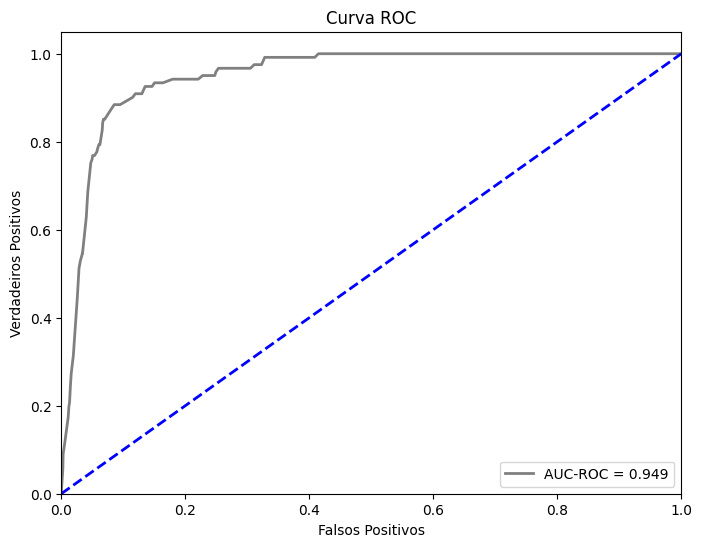

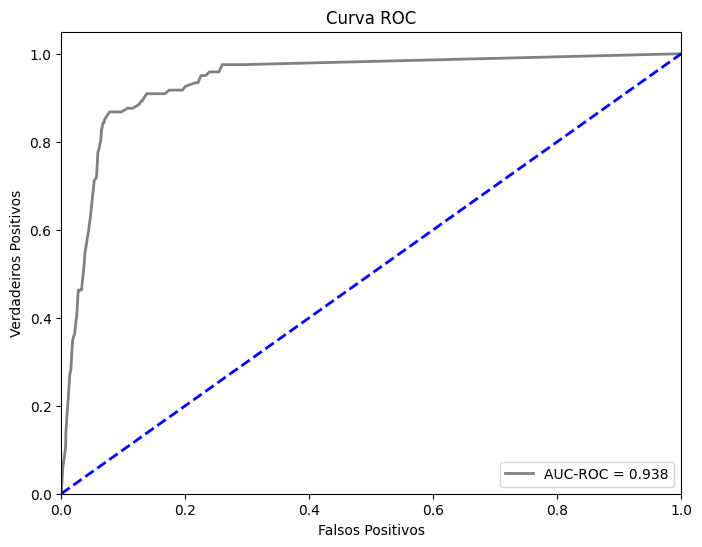

Regressão Logística com GridSearchCV:
[[6503  491]
 [  18  103]]

Métricas de Avaliação:
Exatidão (Accuracy): 0.928
Precisão: 0.98
Sensibilidade (Recall): 0.93
F1-score: 0.95
AUC-ROC: 0.949
Log-Loss: 0.287
Random Forest:
[[6402  592]
 [  16  105]]

Métricas de Avaliação:
Exatidão (Accuracy): 0.915
Precisão: 0.98
Sensibilidade (Recall): 0.91
F1-score: 0.94
AUC-ROC: 0.938
Log-Loss: 0.269

Acurácia no conjunto de treino (Logistic Regression): 0.931
Acurácia no conjunto de teste (Logistic Regression): 0.928

Acurácia no conjunto de treino (Random Forest): 0.919
Acurácia no conjunto de teste (Random Forest): 0.915

Acurácia média com validação cruzada (Random Forest, CV=5): 0.770


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss, roc_curve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('/content/tb_dummy.csv')

# Separar as características e a variável dependente
X = df[['age_dummy', 'dependent_dummy', 'salary_dummy', 'qtd_emprestimos_total_dummy', 'more_90_days_dummy', 'using_lines_dummy', 'debt_ratio_dummy']]
y = df['default_flag']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Estandardizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Função para plotar curva ROC
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='gray', lw=2, label=f'AUC-ROC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

# Modelo de Regressão Logística com GridSearchCV
logreg = LogisticRegression(class_weight='balanced', max_iter=10000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularização
    'solver': ['lbfgs', 'liblinear']  # Diferentes solvers
}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor modelo de regressão logística
best_logreg = grid_search.best_estimator_

# Realizar predições no conjunto de teste
y_pred_logreg = best_logreg.predict(X_test)

# Avaliar o modelo de regressão logística
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1])
log_loss_logreg = log_loss(y_test, best_logreg.predict_proba(X_test))
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, best_logreg.predict_proba(X_test)[:, 1])

# Modelo Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Realizar predições no conjunto de teste
y_pred_rf = rf.predict(X_test)

# Avaliar o modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
log_loss_rf = log_loss(y_test, rf.predict_proba(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

# Plotar curvas ROC
plot_roc_curve(fpr_logreg, tpr_logreg, roc_auc_logreg)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf)

# Exibir resultados da Regressão Logística
print("\033[1mRegressão Logística com GridSearchCV:\033[0m")
print(conf_matrix_logreg)
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy_logreg:.3f}")
print(f"Precisão: {classification_rep_logreg.split()[-4]}")
print(f"Sensibilidade (Recall): {classification_rep_logreg.split()[-3]}")
print(f"F1-score: {classification_rep_logreg.split()[-2]}")
print(f"AUC-ROC: {roc_auc_logreg:.3f}")
print(f"Log-Loss: {log_loss_logreg:.3f}")

# Exibir resultados do Random Forest
print("\033[1mRandom Forest:\033[0m")
print(conf_matrix_rf)
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy_rf:.3f}")
print(f"Precisão: {classification_rep_rf.split()[-4]}")
print(f"Sensibilidade (Recall): {classification_rep_rf.split()[-3]}")
print(f"F1-score: {classification_rep_rf.split()[-2]}")
print(f"AUC-ROC: {roc_auc_rf:.3f}")
print(f"Log-Loss: {log_loss_rf:.3f}")

# Avaliar os modelos de treino e teste para Regressão Logística
train_accuracy_logreg = accuracy_score(y_train, best_logreg.predict(X_train))
test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f'\nAcurácia no conjunto de treino (Logistic Regression): {train_accuracy_logreg:.3f}')
print(f'Acurácia no conjunto de teste (Logistic Regression): {test_accuracy_logreg:.3f}')

# Avaliar os modelos de treino e teste para Random Forest
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'\nAcurácia no conjunto de treino (Random Forest): {train_accuracy_rf:.3f}')
print(f'Acurácia no conjunto de teste (Random Forest): {test_accuracy_rf:.3f}')

# Realizar validação cruzada para Random Forest
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f'\nAcurácia média com validação cruzada (Random Forest, CV=5): {cv_scores_rf.mean():.3f}')


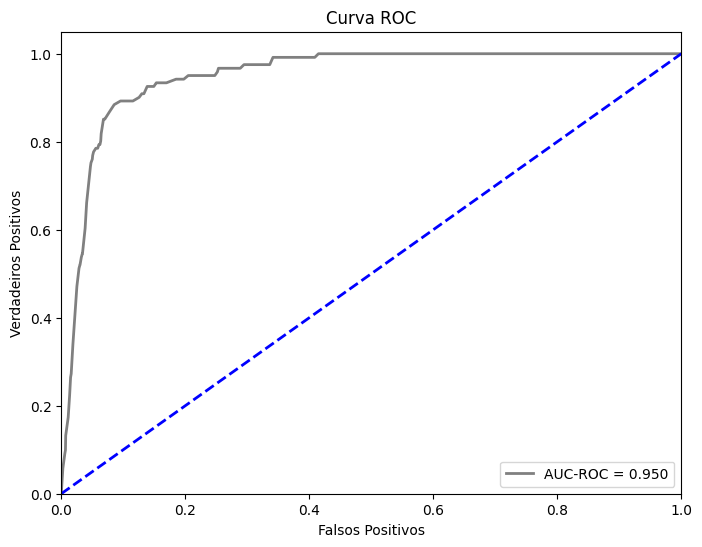

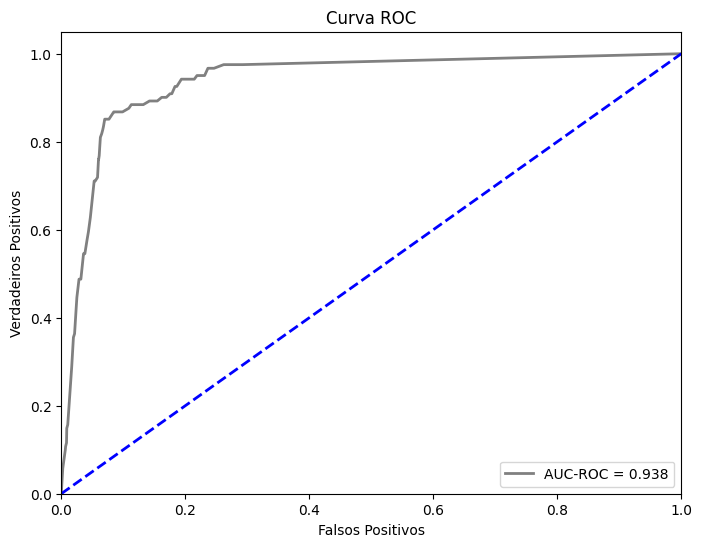

Regressão Logística com GridSearchCV:
[[6503  491]
 [  18  103]]

Métricas de Avaliação:
Exatidão (Accuracy): 0.928
Precisão: 0.98
Sensibilidade (Recall): 0.93
F1-score: 0.95
AUC-ROC: 0.950
Log-Loss: 0.288
Random Forest com GridSearchCV:
[[6303  691]
 [  16  105]]

Métricas de Avaliação:
Exatidão (Accuracy): 0.901
Precisão: 0.98
Sensibilidade (Recall): 0.90
F1-score: 0.93
AUC-ROC: 0.938
Log-Loss: 0.292

Acurácia no conjunto de treino (Logistic Regression): 0.902
Acurácia no conjunto de teste (Logistic Regression): 0.928

Acurácia no conjunto de treino (Random Forest): 0.906
Acurácia no conjunto de teste (Random Forest): 0.901

Acurácia média com validação cruzada (Random Forest, CV=5): 0.770


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss, roc_curve
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('/content/tb_dummy.csv')

# Separar as características e a variável dependente
X = df[['age_dummy', 'dependent_dummy', 'salary_dummy', 'qtd_emprestimos_total_dummy', 'more_90_days_dummy', 'using_lines_dummy', 'debt_ratio_dummy']]
y = df['default_flag']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Estandardizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Função para plotar curva ROC
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='gray', lw=2, label=f'AUC-ROC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

# Modelo de Regressão Logística com GridSearchCV
logreg = LogisticRegression(class_weight='balanced', max_iter=10000)
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularização
    'solver': ['lbfgs', 'liblinear']  # Diferentes solvers
}
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

# Melhor modelo de regressão logística
best_logreg = grid_search_logreg.best_estimator_

# Realizar predições no conjunto de teste
y_pred_logreg = best_logreg.predict(X_test)

# Avaliar o modelo de regressão logística
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, best_logreg.predict_proba(X_test)[:, 1])
log_loss_logreg = log_loss(y_test, best_logreg.predict_proba(X_test))
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, best_logreg.predict_proba(X_test)[:, 1])

# Ajuste de Hiperparâmetros para Random Forest com GridSearchCV
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Melhor modelo Random Forest
best_rf = grid_search_rf.best_estimator_

# Realizar predições no conjunto de teste
y_pred_rf = best_rf.predict(X_test)

# Avaliar o modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
log_loss_rf = log_loss(y_test, best_rf.predict_proba(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])

# Plotar curvas ROC
plot_roc_curve(fpr_logreg, tpr_logreg, roc_auc_logreg)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf)

# Exibir resultados da Regressão Logística
print("\033[1mRegressão Logística com GridSearchCV:\033[0m")
print(conf_matrix_logreg)
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy_logreg:.3f}")
print(f"Precisão: {classification_rep_logreg.split()[-4]}")
print(f"Sensibilidade (Recall): {classification_rep_logreg.split()[-3]}")
print(f"F1-score: {classification_rep_logreg.split()[-2]}")
print(f"AUC-ROC: {roc_auc_logreg:.3f}")
print(f"Log-Loss: {log_loss_logreg:.3f}")

# Exibir resultados do Random Forest
print("\033[1mRandom Forest com GridSearchCV:\033[0m")
print(conf_matrix_rf)
print("\n\033[1mMétricas de Avaliação:\033[0m")
print(f"Exatidão (Accuracy): {accuracy_rf:.3f}")
print(f"Precisão: {classification_rep_rf.split()[-4]}")
print(f"Sensibilidade (Recall): {classification_rep_rf.split()[-3]}")
print(f"F1-score: {classification_rep_rf.split()[-2]}")
print(f"AUC-ROC: {roc_auc_rf:.3f}")
print(f"Log-Loss: {log_loss_rf:.3f}")

# Avaliar os modelos de treino e teste para Regressão Logística
train_accuracy_logreg = accuracy_score(y_train, best_logreg.predict(X_train))
test_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f'\nAcurácia no conjunto de treino (Logistic Regression): {train_accuracy_logreg:.3f}')
print(f'Acurácia no conjunto de teste (Logistic Regression): {test_accuracy_logreg:.3f}')

# Avaliar os modelos de treino e teste para Random Forest
train_accuracy_rf = accuracy_score(y_train, best_rf.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'\nAcurácia no conjunto de treino (Random Forest): {train_accuracy_rf:.3f}')
print(f'Acurácia no conjunto de teste (Random Forest): {test_accuracy_rf:.3f}')

# Realizar validação cruzada para Random Forest
cv_scores_rf = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')
print(f'\nAcurácia média com validação cruzada (Random Forest, CV=5): {cv_scores_rf.mean():.3f}')


#Regressão Logística: Melhorando a qualidade do modelo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Separar as variáveis independentes (features) e a variável dependente (target)
X = df.drop('default_flag', axis=1)  # variável alvo
y = df['default_flag']  # variável alvo

In [ ]:
# Dividir os dados em conjuntos de treino e teste

# stratify=y divide os dados de maneira que a distribuição das classes na variável alvo (y) seja a mesma nos conjuntos de treino e teste.
# sendo essencial quando temos um dataset desbalanceado.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Treinar o modelo de Regressão Logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Coeficientes do modelo
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                                              Coefficient
more_90_days_overdue                             0.875268
number_times_delayed_payment_loan_30_59_days     0.758024
number_times_delayed_payment_loan_60_89_days     0.557582
number_dependents                                0.075168
dependentes_dummy                               -0.068615
using_lines_not_secured_personal_assets         -0.076752
debt_ratio                                      -0.248503
qtd_emprestimo_total                            -0.373234
age                                             -0.593577
last_month_salary                               -0.889137


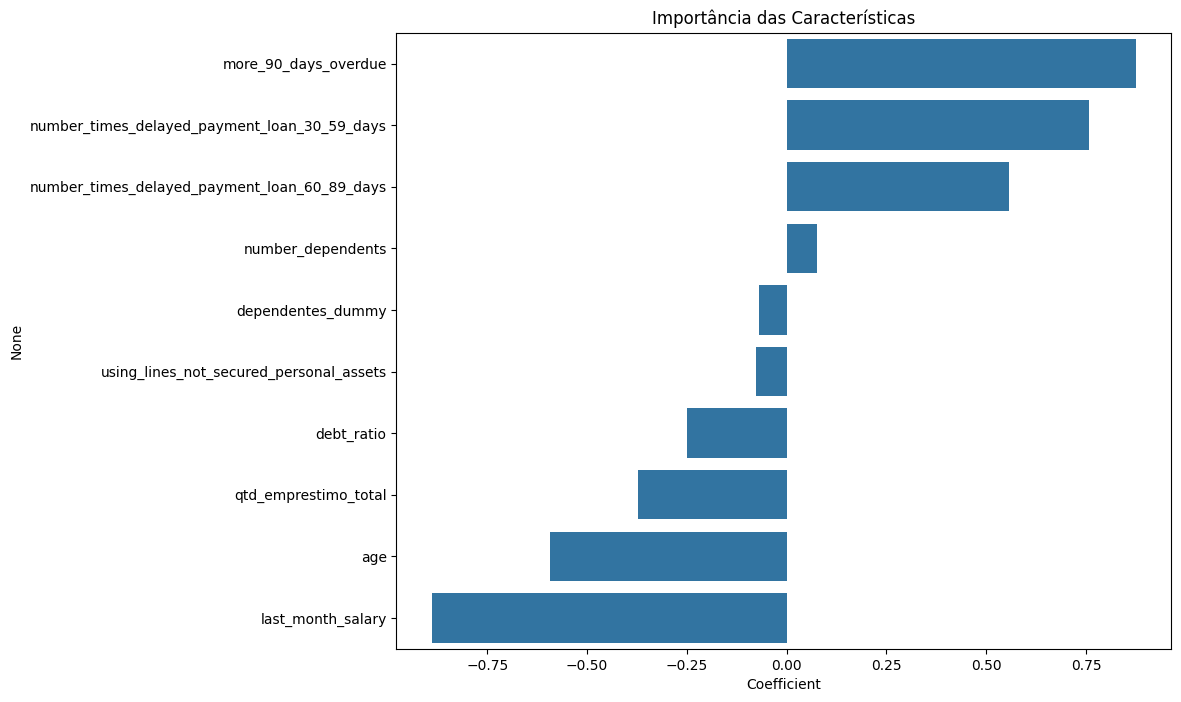

In [ ]:
# Plotando os coeficientes
plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Importância das Características')
plt.show()

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[10456    30]
 [   74   113]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10486
           1       0.79      0.60      0.68       187

    accuracy                           0.99     10673
   macro avg       0.89      0.80      0.84     10673
weighted avg       0.99      0.99      0.99     10673



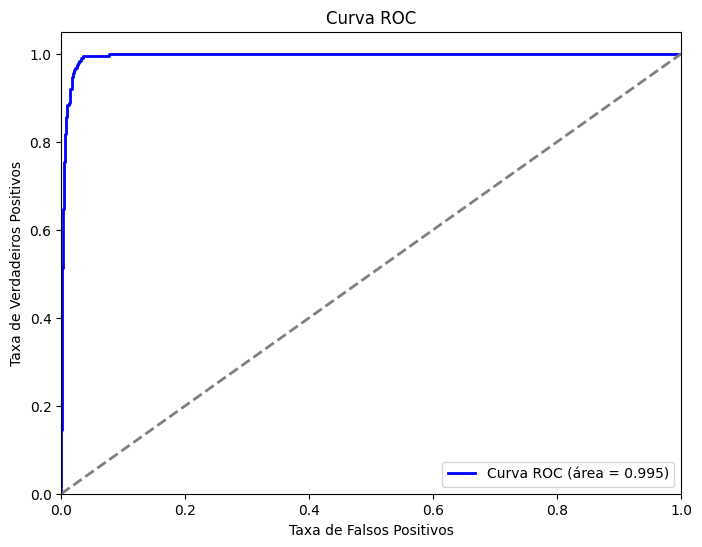

In [ ]:
# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()